In [87]:
import pandas as pd
import numpy as np

def make_a_float(dataItem):
    # check the data type. If a string, remove the dollar sign
    # and any N/As
    if type(dataItem) is str:
        return(dataItem.replace('$', '').replace('N/A', ''))
    return(dataItem)

def correlation ( attribute1 , fileName1 , attribute2, fileName2 ):
    # Read in the two files
    fOne = pd.read_csv(fileName1, sep=",")
    fTwo = pd.read_csv(fileName2, sep=",")
    # Clean up the data to ensure all options are redefined as floats
    fOneClean = fOne[attribute1].apply(make_a_float).astype('float')
    fTwoClean = fTwo[attribute2].apply(make_a_float).astype('float')
    # Calculate the correlation coefficient
    return fOneClean.corr(fTwoClean, 'pearson')

def min_max_normalization(fileName, attribute):
    csv_file = pd.read_csv(fileName)
    pd_attribute = csv_file[attribute]
    pd_attribute_clean = pd_attribute.apply(make_a_float).astype('float').fillna(0)
    max_val = pd_attribute_clean.max()
    min_val = pd_attribute_clean.min()
    max_minus_min = max_val - min_val
    min_max = list()
    for i in pd_attribute_clean:
        min_max.append((i-min_val)/max_minus_min)
    return min_max

def zscore_normalization(fileName, attribute):
    csv_file = pd.read_csv(fileName)
    pd_attribute = csv_file[attribute]
    pd_attribute_clean = pd_attribute.apply(make_a_float).astype('float').fillna(0)
    mean = pd_attribute_clean.mean()
    std = pd_attribute_clean.std()
    zscore = list()
    for i in pd_attribute_clean:
        zscore.append((i-mean)/std)
    return zscore

[-2.169544182778481, -2.169544182778481, -2.169544182778481, -2.169544182778481, -2.169544182778481, -2.169544182778481, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.8687686258930183, -1.883512525740345, -1.883512525740345, -1.883512525740345, -1.9351161752059878, -1.9351161752059878, -1.9351161752059878, -1.957232024976978, -1.9454369050991167, -1.8982564255876715, -1.8982564255876715, -1.8982564255876715, -1.8982564255876715, -1.8982564255876715, -1.8982564255876715, -1.8982564255876715, -1.986719824671631, -1.986719824671631, -1.986719824671631, -2.1046710234502437, -2.001463724518958, -2.2497509979479378, -2.2497509979479378, -2.2497509979479378, -2.2497509979479378, -2.2497509979479378, -1.986719824671631, -1.986719824671631, -1.986719824671631, -1.9719759248243045, -1.97197

Text(0.5, 1.0, 'High vs. Low for HD over 5 years')

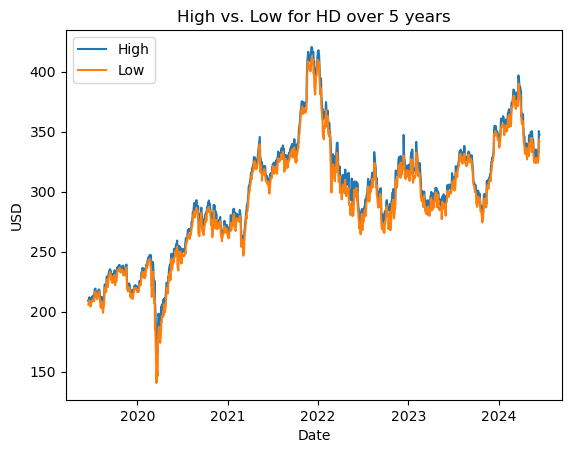

In [106]:
import matplotlib.pyplot as plt

def make_a_float(dataItem):
    # check the data type. If a string, remove the dollar sign
    # and any N/As
    if type(dataItem) is str:
        return(dataItem.replace('$', '').replace('N/A', ''))
    return(dataItem)

HD_data = pd.read_csv('HD.csv', sep=",")
dates = pd.to_datetime(HD_data['Date'])
high_attribute = HD_data['High'].apply(make_a_float).astype('float')
low_attribute = HD_data['Low'].apply(make_a_float).astype('float')

# High vs. Low
plt.plot(dates, high_attribute, label="High")
plt.plot(dates, low_attribute, label="Low")
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.title('High vs. Low for HD over 5 years')

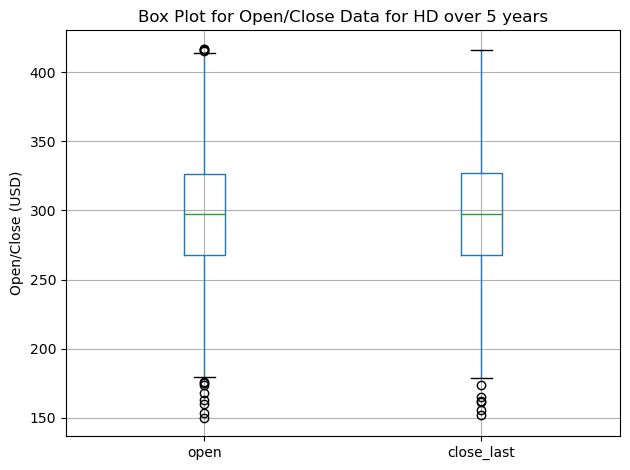

In [118]:
# Box Plot
open_attribute = HD_data['Open'].apply(make_a_float).astype('float')
close_attribute = HD_data['Close/Last'].apply(make_a_float).astype('float')
plt.rcParams["figure.autolayout"] = True
df = pd.DataFrame(dict(open=open_attribute, close_last=close_attribute))
df.boxplot()
plt.ylabel('Open/Close (USD)')
plt.title('Box Plot for Open/Close Data for HD over 5 years')
plt.show()

(array([382., 638., 137.,  49.,  22.,  15.,   7.,   5.,   2.,   2.]),
 array([ 1093947. ,  2959834.3,  4825721.6,  6691608.9,  8557496.2,
        10423383.5, 12289270.8, 14155158.1, 16021045.4, 17886932.7,
        19752820. ]),
 <BarContainer object of 10 artists>)

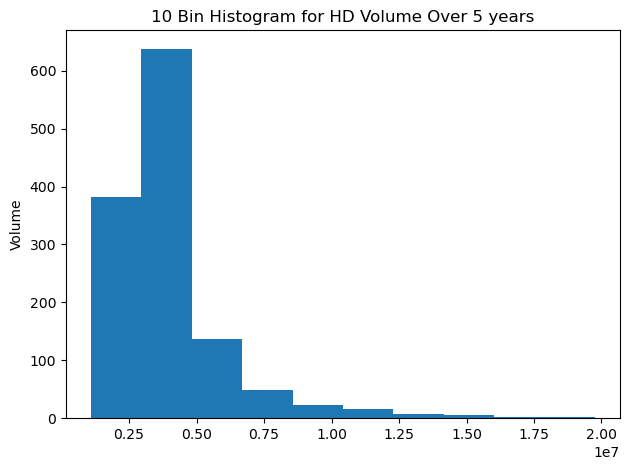

In [119]:
# 10 bin histogram of Volume
volume_attribute = HD_data['Volume'].apply(make_a_float).astype('float')
plt.ylabel('Volume')
plt.title('10 Bin Histogram for HD Volume Over 5 years')
plt.hist(volume_attribute, bins=10)

Text(0.5, 1.0, 'HD Open/Close Delta Over 5 Years')

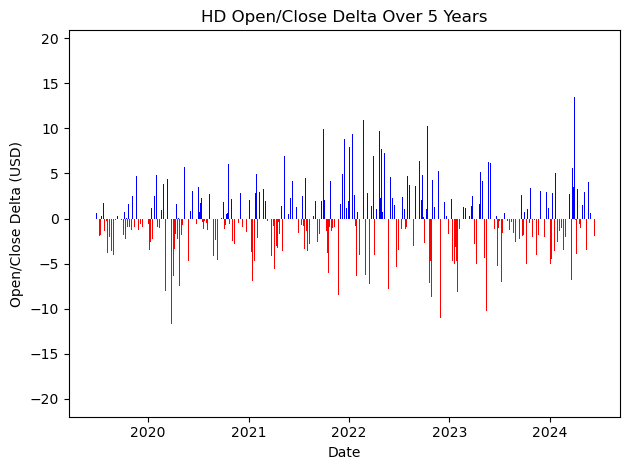

In [129]:
# Calculate the delta between close and open to see if the day was negative or not
open_minus_close = open_attribute - close_attribute
plt.bar(dates, open_minus_close,color=np.where(open_minus_close < 0, 'red', 'blue'))
plt.xlabel('Date')
plt.ylabel('Open/Close Delta (USD)')
plt.title('HD Open/Close Delta Over 5 Years')